In [6]:
# Setup Kaggle Key in ~/.kaggle/kaggle.json first and ensure read access only for this user, .e.g., !chmod 0600 ~/.kaggle/kaggle.json
#!pip install -q kaggle
#!mkdir ./data
#!kaggle datasets download -d tawsifurrahman/covid19-radiography-database -p ./data
#!unzip ./data/covid19-radiography-database.zip -d ./data/

716.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [122]:
# Some dependencies
!pip install opencv-python

4261.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 19.2 MB/s eta 0:00:0000:0100:01


In [123]:
# General
import os

# Standard Data
import numpy as np
import pandas as pd

# Image Specific
from PIL import Image
import cv2

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Pandas config
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)
pd.set_option('max_colwidth', 100)

# EDA

In [21]:
# Path to data
local_path = "./data/COVID-19_Radiography_Dataset"
data_path = os.path.join(local_path)

In [166]:
# Taken from book 1
label_folders = ["Normal", "COVID"]

data = []
for id, label_folder in enumerate(label_folders):
    images_folder = os.path.join(label_folder, "images")
    for file in os.listdir(os.path.join(data_path, images_folder)):
        data.append([file, label_folder, data_path + '/' + images_folder + "/" + file])

data = pd.DataFrame(data, columns = ['image_name', 'label', 'path'])

# data['path'] = data_path + '/' + data['image_name']
data['label'] = data['label'].map({'Normal': 'Negative', 'COVID': 'Positive'})

data.head()

,image_name,label,path
0,Normal-4151.png,Negative,./data/COVID-19_Radiography_Dataset/Normal/images/Normal-4151.png
1,Normal-7226.png,Negative,./data/COVID-19_Radiography_Dataset/Normal/images/Normal-7226.png
2,Normal-4130.png,Negative,./data/COVID-19_Radiography_Dataset/Normal/images/Normal-4130.png
3,Normal-475.png,Negative,./data/COVID-19_Radiography_Dataset/Normal/images/Normal-475.png
4,Normal-6141.png,Negative,./data/COVID-19_Radiography_Dataset/Normal/images/Normal-6141.png


In [206]:
data.columns

Index(['image_name', 'label', 'path', 'image'], dtype='object')

In [208]:
data.dtypes

image_name    object
label         object
path          object
image         object
dtype: object

In [209]:
data.shape

(13808, 4)

In [167]:
print('Number of Duplicated Samples: %d'%(data.duplicated().sum()))
print('Number of Total Samples: %d'%(data.isnull().value_counts()))

Number of Duplicated Samples: 0
Number of Total Samples: 13808


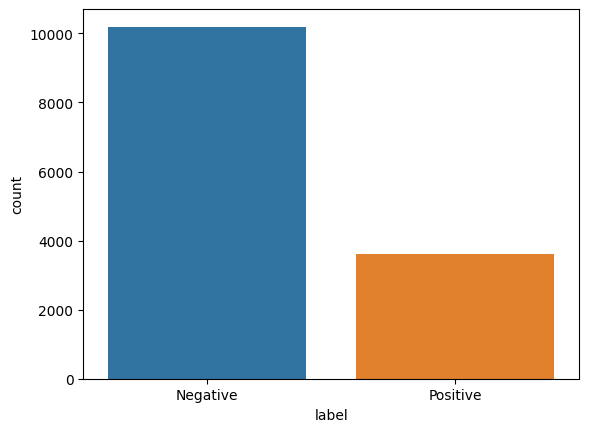

In [168]:
# View class balance/(imbalance in this case)
df = data.groupby('label', as_index=False).agg(count=("label", "count"))
sns.barplot(df, x='label', y='count')
plt.show()

## Image EDA

### Visualise some images

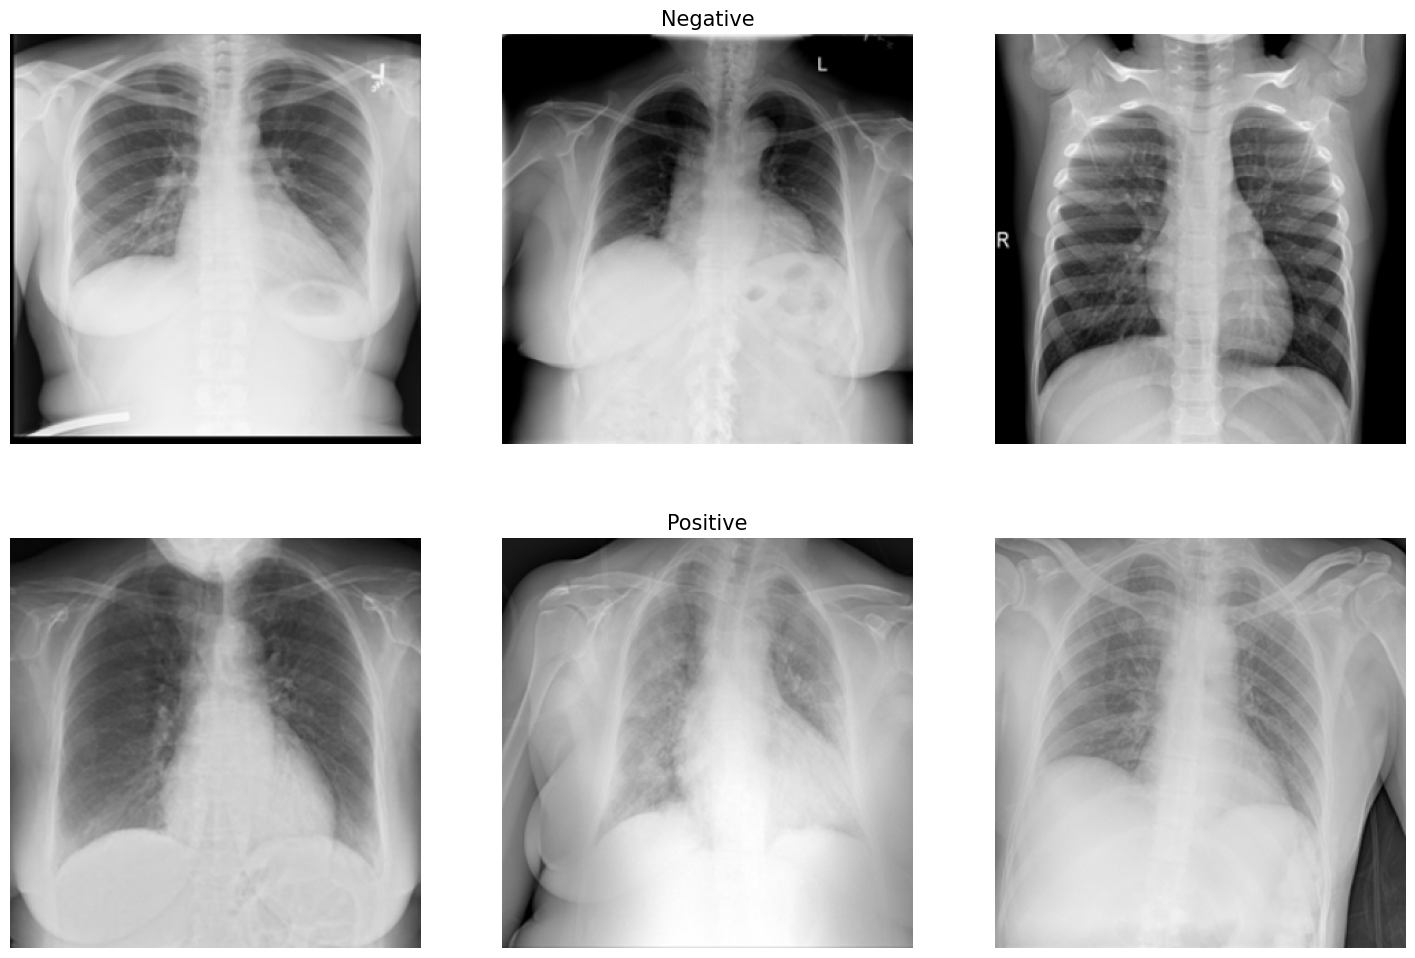

In [170]:
# Taken from book 1
n_samples = 3

fig, m_axs = plt.subplots(2, n_samples, figsize = (6*n_samples, 3*4))
# sample_df = data.sample(n=n_samples)

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['label']).groupby('label')):
    n_axs[1].set_title(type_name, fontsize = 15)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

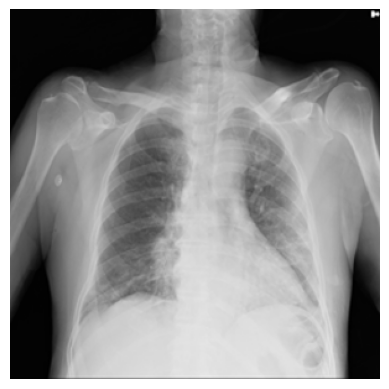

In [171]:
def sample_one_image(data):
    sample = data.sample(n=1).iloc[0]
    plt.figure()
    image = cv2.imread(str(sample.path))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return image
    
sampled_image = sample_one_image(data)

In [172]:
def get_image_details(image):
    print('Image Shape: {}'.format(image.shape))
    print('Image Height: {}'.format(image.shape[0]))
    print('Image Width: {}'.format(image.shape[1]))
    print('Image Dimension: {}'.format(image.ndim))
    print('Image Size: {}kb'.format(image.size//1024))
    print('Image Data Type: {}'.format(image.dtype))
    print('Maximum RGB value of the image: {}'.format(image.max()))
    print('Minimum RGB value of the image: {}'.format(image.min()))
    
get_image_details(sampled_image)

Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 255
Minimum RGB value of the image: 0


## Value distribution within images

This is useful as we may apply gamma correction as performed in the primary paper.

First need to load image data into dataframe, we will keep the size of images small for now as only looking at aggregated metrics.

In [175]:
# Load images into dataframe and resize to 100x100 (small)
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((100,100))))

,image_name,label,path,image
0,Normal-4151.png,Negative,./data/COVID-19_Radiography_Dataset/Normal/images/Normal-4151.png,"[[27, 15, 11, 11, 10, 10, 10, 9, 8, 7, 7, 5, 7, 12, 17, 20, 24, 29, 35, 40, 44, 49, 53, 58, 63, ..."
1,Normal-7226.png,Negative,./data/COVID-19_Radiography_Dataset/Normal/images/Normal-7226.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,Normal-4130.png,Negative,./data/COVID-19_Radiography_Dataset/Normal/images/Normal-4130.png,"[[27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Normal-475.png,Negative,./data/COVID-19_Radiography_Dataset/Normal/images/Normal-475.png,"[[10, 41, 64, 80, 91, 104, 130, 150, 148, 140, 130, 128, 128, 131, 148, 104, 91, 95, 99, 106, 10..."
4,Normal-6141.png,Negative,./data/COVID-19_Radiography_Dataset/Normal/images/Normal-6141.png,"[[195, 199, 202, 199, 89, 25, 33, 37, 37, 37, 36, 36, 36, 36, 35, 36, 36, 36, 36, 36, 36, 36, 36..."


In [177]:
mean_val = []
std_dev_val = []
max_val = []
min_val = []

for i in range(0, len(data)):
    mean_val.append(data['image'][i].mean())
    std_dev_val.append(np.std(data['image'][i]))
    max_val.append(data['image'][i].max())
    min_val.append(data['image'][i].min())

imageEDA = data.loc[:,['image','label','path']]
imageEDA['mean'] = mean_val
imageEDA['stedev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

imageEDA['subt_mean'] = imageEDA['mean'].mean() - imageEDA['mean']

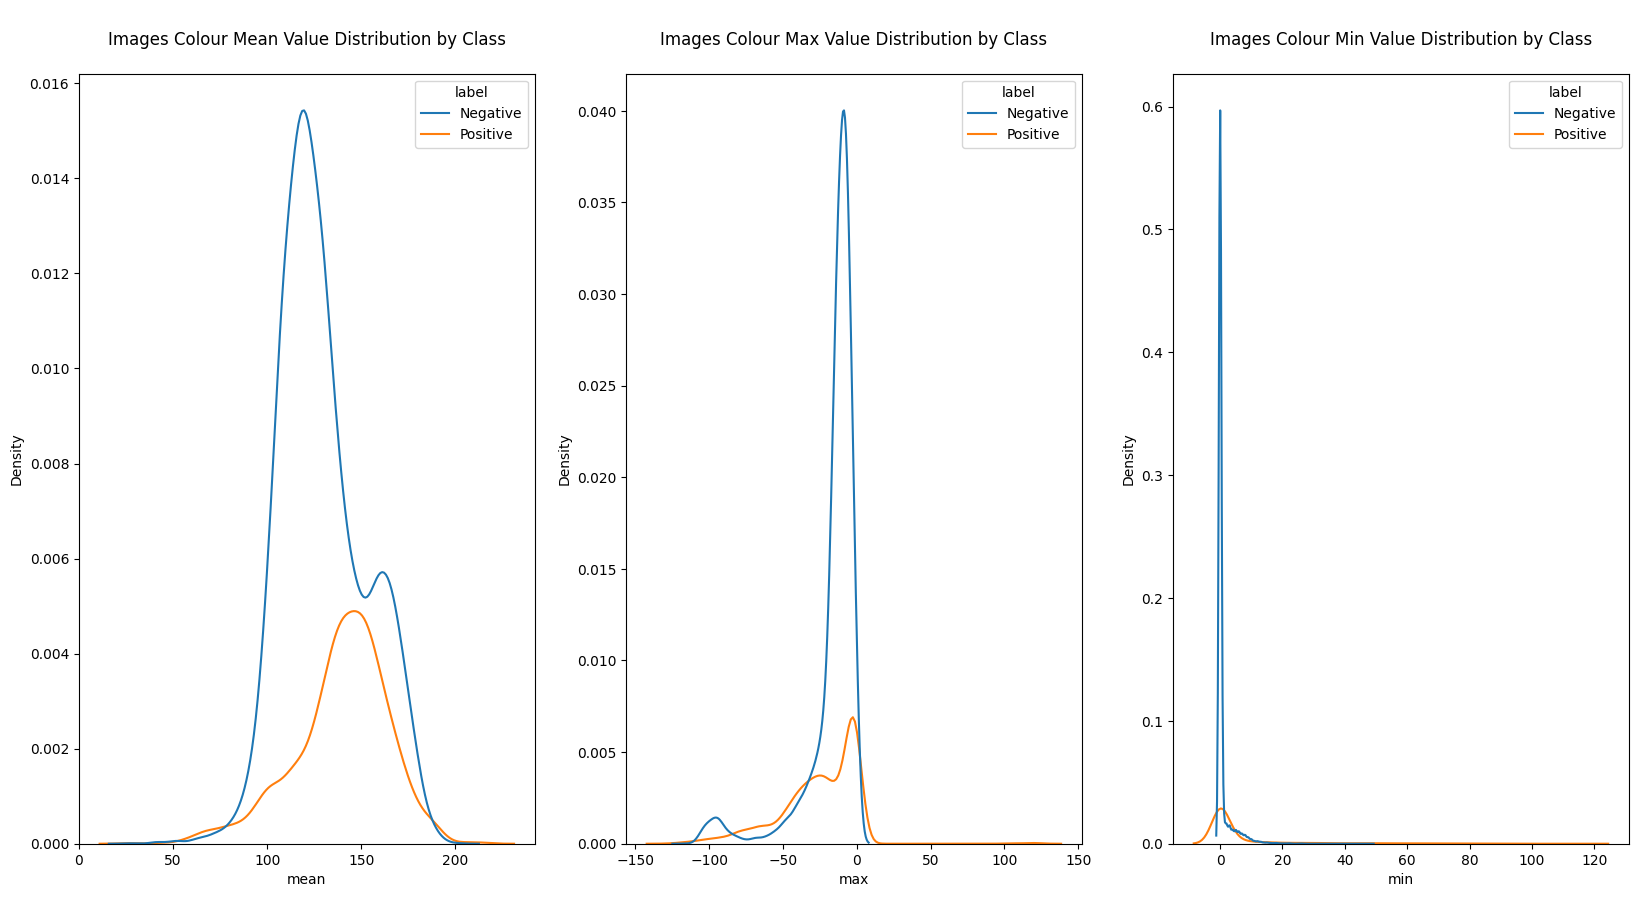

In [190]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,10))

sns.kdeplot(data = imageEDA, x = 'mean', hue = 'label', ax=ax1)
ax1.set_title('Images Colour Mean Value Distribution by Class\n', fontsize = 12);

sns.kdeplot(data = imageEDA, x = 'max', hue = 'label', ax=ax2);
ax2.set_title('\nImages Colour Max Value Distribution by Class\n', fontsize = 12);

sns.kdeplot(data = imageEDA, x = 'min',hue = 'label', ax=ax3);
ax3.set_title('\nImages Colour Min Value Distribution by Class\n', fontsize = 12);

    The Mean vs Density plot insights for pixels:

        The max pixel value for Covid Negative cases is greater than 0.014 and less than 0.016.
        The max pixel value for Covid Positive cases is greater than 0.004 & less than 0.006.

    The Max vs Density plot insights for pixels:

        The max pixel value for Covid Negative cases is greater than 0.035 and less than 0.040.
        The max pixel value for Covid Positive cases is 0.005.

    The Min vs Density plot insights for pixels:

        The max pixel value for Covid Negative cases is greater than 0.4.
        The max pixel value for Covid Positive cases is greater than 0.0 and less than 0.1.





The Mean vs Density plot insights for pixels:

1. The max pixel value for Covid Negative cases is greater than 0.014 and less than 0.016.
2. The max pixel value for Covid Positive cases is greater than 0.004 & less than 0.006.

The Max vs Density plot insights for pixels:

1. The max pixel value for Covid Negative cases is greater than 0.035 and less than 0.040.
2. The max pixel value for Covid Positive cases is 0.005.

The Min vs Density plot insights for pixels:

1. The max pixel value for Covid Negative cases is greater than 0.4.
2. The max pixel value for Covid Positive cases is greater than 0.0 and less than 0.1.



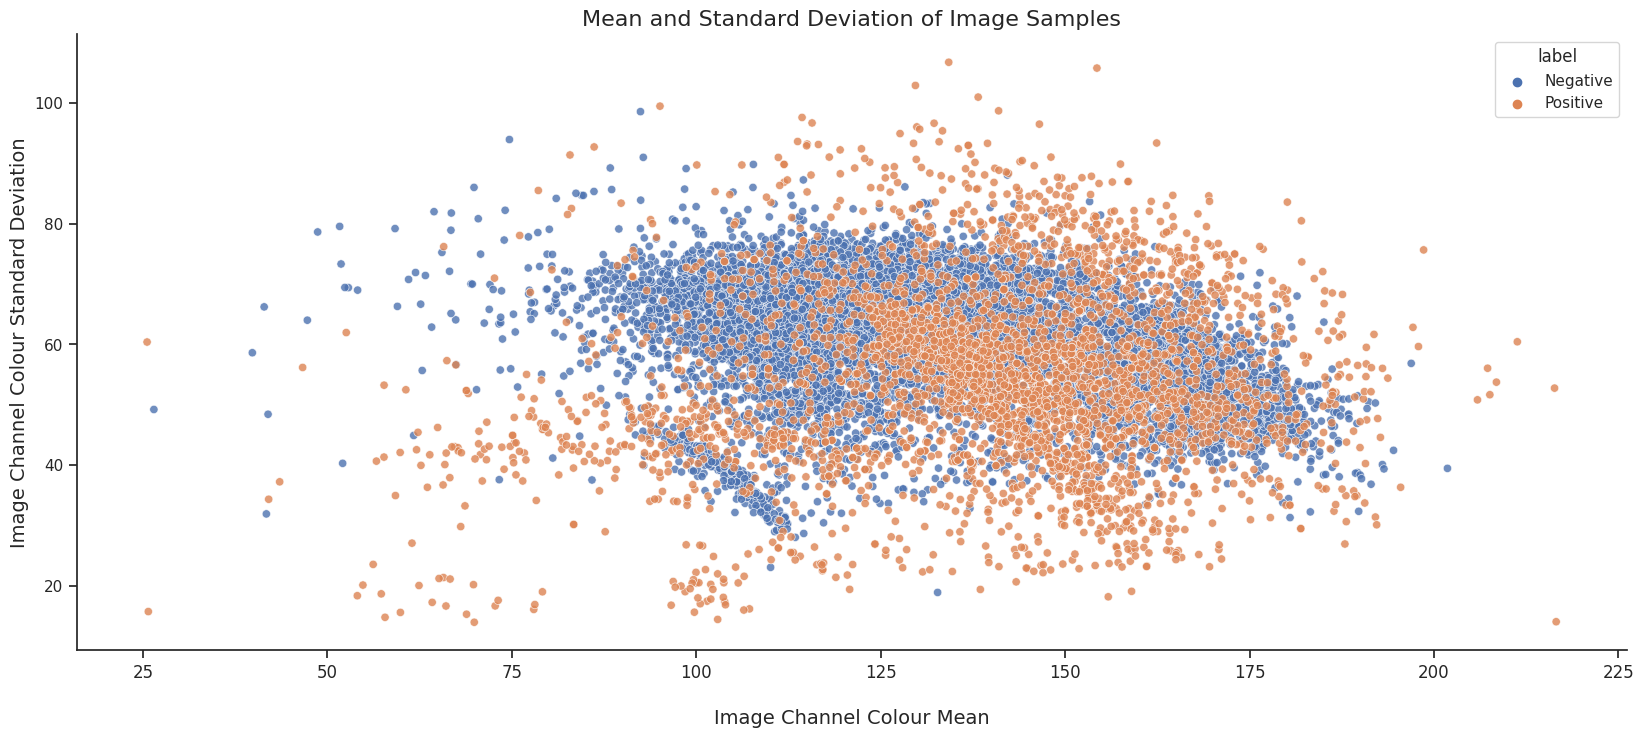

In [192]:
plt.figure(figsize = (20, 8))
sns.set(style = "ticks", font_scale = 1)
ax = sns.scatterplot(data = imageEDA, x = "mean", y = imageEDA['stedev'], hue = 'label', alpha = 0.8);
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation = 0, fontsize = 12)
ax.set_xlabel('\nImage Channel Colour Mean', fontsize = 14)
ax.set_ylabel('Image Channel Colour Standard Deviation', fontsize = 14)
plt.title('Mean and Standard Deviation of Image Samples', fontsize = 16);

# Baseline Simple CNN Model

In [213]:
# Model and Eval
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [202]:
all_data = []

# Storing images and their labels into a list for further Train Test split

label_map = {
    "Normal": 0,
    "Positive": 1
}

for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (70, 70)) / 255.0
    label = 1 if data['label'][i] == "Positive" else 0
    all_data.append([image, label])

In [204]:
x = []
y = []

# Split into x (images) and y (label)
for image, label in all_data:
    x.append(image)
    y.append(label)

# Converting to Numpy Array    
x = np.array(x)
y = np.array(y)

# Split 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(9941, 70, 70, 3) (2762, 70, 70, 3) (1105, 70, 70, 3) (9941,) (2762,) (1105,)


In [214]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (70, 70, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.3))

cnn_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.5))

cnn_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(units = 16, activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))

cnn_model.add(layers.Dense(units = 2))

cnn_model.compile(optimizer = 'adam', 
           loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
           metrics = ['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 68, 68, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 34, 34, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)       

In [215]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)

history = cnn_model.fit(x_train, y_train, 
                        epochs = 50, batch_size = 256,  
                        validation_data = (x_val, y_val), 
                        callbacks = [early_stop])

Epoch 1/50


2023-03-26 13:40:48.626542: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 584530800 exceeds 10% of free system memory.
2023-03-26 13:40:49.965773: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 606076928 exceeds 10% of free system memory.
2023-03-26 13:40:52.698685: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 606076928 exceeds 10% of free system memory.


 1/39 [..............................] - ETA: 2:48 - loss: 0.7397 - accuracy: 0.3516

2023-03-26 13:40:53.474689: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 606076928 exceeds 10% of free system memory.
2023-03-26 13:40:55.601544: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 606076928 exceeds 10% of free system memory.


39/39 [==============================] - 119s 3s/step - loss: 0.5927 - accuracy: 0.7239 - val_loss: 0.5306 - val_accuracy: 0.7638
Epoch 2/50
39/39 [==============================] - 115s 3s/step - loss: 0.5051 - accuracy: 0.7330 - val_loss: 0.4162 - val_accuracy: 0.7638
Epoch 3/50
39/39 [==============================] - 114s 3s/step - loss: 0.4536 - accuracy: 0.7330 - val_loss: 0.3628 - val_accuracy: 0.7638
Epoch 4/50
16/39 [===========>..................] - ETA: 1:06 - loss: 0.4234 - accuracy: 0.7349

KeyboardInterrupt: 